# Testing Notebook

In [1]:
import sys
import os
import importlib
import pandas as pd
import numpy as np

In [2]:
import koopomics.model.model_loader as ko


In [3]:
import koopomics.model.embeddingANN as em
import koopomics.model.koopmanANN as op
importlib.reload(em)
importlib.reload(op)


<module 'koopomics.model.koopmanANN' from '/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/koopomics/model/koopmanANN.py'>

In [7]:
importlib.reload(ko)


NameError: name 'ko' is not defined

In [5]:
embedding_model = em.FF_AE([264,100,100,20], [20,100,100,264])

In [6]:
embedding_model = em.DiffeomMap([200,100,100,20],[20,100,100,200],[1,3,5])

In [7]:
embedding_model

DiffeomMap(
  (encode_NN): Sequential(
    (0): Linear(in_features=200, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=20, bias=True)
  )
  (deconv_liftNN): Sequential(
    (0): Linear(in_features=20, out_features=100, bias=True)
    (1): ReLU()
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU()
    (4): Linear(in_features=100, out_features=200, bias=True)
  )
  (deconv_outputNN): ModuleList(
    (0-199): 200 x Sequential(
      (0): Linear(in_features=1, out_features=3, bias=True)
      (1): ReLU()
      (2): Linear(in_features=3, out_features=5, bias=True)
      (3): ReLU()
    )
  )
)

In [8]:
operator_model = op.LinearizingKoop(linearizer=op.FFLinearizer([20,30,50], [50,30,20]), koop=op.InvKoop(latent_dim=50))

In [4]:
embedding_model = em.FF_AE([264,100,100,20], [20,100,100,264])
operator_model = op.LinearizingKoop(linearizer=op.FFLinearizer([20,30,50], [50,30,20]), koop=op.InvKoop(latent_dim=50))

LinKoopAE_model = ko.KoopmanModel(embedding=embedding_model, operator=operator_model)

Model loaded with:


In [11]:
LinKoopAE_model

KoopmanModel(
  (embedding): FF_AE(
    (encode): Sequential(
      (0): Linear(in_features=264, out_features=100, bias=True)
      (1): ReLU()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=20, bias=True)
    )
    (decode): Sequential(
      (0): Linear(in_features=20, out_features=100, bias=True)
      (1): ReLU()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=264, bias=True)
    )
  )
  (operator): LinearizingKoop(
    (linearizer): FFLinearizer(
      (lin_encode): Sequential(
        (0): Linear(in_features=20, out_features=30, bias=True)
        (1): ReLU()
        (2): Linear(in_features=30, out_features=50, bias=True)
      )
      (lin_decode): Sequential(
        (0): Linear(in_features=50, out_features=30, bias=True)
        (1): ReLU()
        (2): Linear(in_features=30, out_features=20, bias=True)
      )
   

In [5]:
pregnancy_df = pd.read_csv('/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/input_data/pregnancy/pregnancy_interpolated_preprocessed.csv')

In [12]:
pregnancy_df

,Subject ID,Cohort,Labor onset,Gestational age (GA)/days,Gestational age (GA)/weeks,Birth GA/weeks,(+)-.alpha.-Tocopherol,(R)-2-Hydroxycaprylic acid,"1,4-Dihydroxybenzene",1-Methylxanthine,...,"cis-5,8,11,14,17-Eicosapentaenoic acid",cis-5-Dodecenoic acid,cis-9-Palmitoleic acid,d-LIMONENE,gamma-CEHC,gamma-Glutamylleucine,ketoisocaproic acid,p-Cresol,phenylacetylglutamine,trans-Vaccenic acid
0,DP01,Discovery,natural,35,5,38.714286,12.187246,10.075398,9.315506,10.907293,...,11.183291,10.799411,12.059483,5.643133,10.495975,12.157863,14.377687,10.635153,14.263246,11.150043
1,DP01,Discovery,natural,42,6,38.714286,12.643866,9.871381,7.523938,10.954945,...,11.018465,10.230143,11.844556,5.497642,9.847823,12.110144,14.217800,10.610887,14.001904,10.924683
2,DP01,Discovery,natural,49,7,38.714286,13.632884,10.025761,4.431244,9.715949,...,10.537209,9.326564,11.616709,6.736850,9.342694,12.174268,14.225116,10.848017,14.178476,10.705275
3,DP01,Discovery,natural,56,8,38.714286,12.125875,10.253546,5.250766,9.805404,...,10.672192,8.790673,11.874221,7.195789,10.022338,12.604769,14.749239,10.571532,14.042197,11.155579
4,DP01,Discovery,natural,63,9,38.714286,12.657642,10.162621,8.130034,10.349446,...,10.788551,8.972928,11.831649,6.579638,10.032035,12.329358,14.939134,10.303965,13.876263,11.085732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,DP30,Validation (Test Set 1),natural,245,35,38.857143,12.115260,11.037353,6.541048,10.235494,...,11.053052,9.530414,12.100110,6.634040,9.352964,12.271830,14.366054,10.805234,14.887704,11.551004
697,DP30,Validation (Test Set 1),natural,252,36,38.857143,12.469027,11.543126,6.903586,10.341836,...,11.048241,9.437662,12.121246,6.724391,9.135123,11.884873,14.472117,10.867624,14.675015,10.905095
698,DP30,Validation (Test Set 1),natural,259,37,38.857143,14.027342,10.293517,7.147000,10.042527,...,10.755617,9.205752,12.077126,6.181048,9.846376,12.123202,14.680196,10.440013,14.345236,10.808394
699,DP30,Validation (Test Set 1),natural,266,38,38.857143,12.575002,10.068778,9.200918,9.555815,...,10.292866,9.692128,12.429983,6.789644,8.926737,12.228364,14.663350,10.208924,13.998535,11.138388


In [16]:
import koopomics.training.data_loader as tr
importlib.reload(tr)


<module 'koopomics.training.data_loader' from '/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/koopomics/training/data_loader.py'>

In [12]:
print(dir(tr))


['DataLoader', 'Dataset', 'TimeSeriesDataset', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', 'clear_output', 'collate_fn', 'data_loader', 'dataloader_AE', 'get_dynamic_targets', 'lr_scheduler', 'nn', 'np', 'pd', 'plt', 'torch', 'train', 'train_utils', 'update_batch_loss_plot', 'update_batch_loss_subplots']


In [17]:
# Initialize dataset
feature_list = pregnancy_df.columns[6:]

dataloader = tr.dataloader_AE(pregnancy_df, feature_list, sample_id='Subject ID', time_id='Gestational age (GA)/weeks', batch_size=5)


In [16]:
# Subject ID = Sample identifier
# feature list
# Time identifier

dfs = {subject_id: group for subject_id, group in pregnancy_df.groupby('Subject ID')}


In [17]:
import torch
from torch.utils.data import Dataset, DataLoader


class TimeSeriesDataset(Dataset):
    def __init__(self, df, feature_list, sample_id='Subject ID', time_id=''):
        """
        Args:
            df (pd.DataFrame): The dataframe containing all the data.
            feature_list (list): List of columns to be used as features.
            sample_id (str): The column name representing the sample grouping (e.g., 'Subject ID').
        """
        self.df = df
        self.feature_list = feature_list
        self.sample_id = sample_id
        
        self.grouped = self.df.groupby(sample_id)
        self.sample_ids = list(self.grouped.groups.keys()) 
        self.time_id = time_id
    
    def __len__(self):
        # Return the number of unique samples (i.e., groups based on sample_id)
        return len(self.sample_ids)
    
    def __getitem__(self, idx):
        # Get the sample ID based on the index
        current_sample_id = self.sample_ids[idx]
        
        # Retrieve all rows for this sample (time points) and filter by features
        sample_df = self.grouped.get_group(current_sample_id)[self.feature_list]
        row_indices = self.grouped.get_group(current_sample_id).index
        time_indices = self.grouped.get_group(current_sample_id)[self.time_id].round().astype(int).values
        
        # Convert the filtered DataFrame (time points x features) to a tensor [num_time_points [num_features]]
        input_data = torch.tensor(sample_df.values.astype(np.float32))  # Shape: (num_time_points, num_features)
        
        
        return {
            'input_data': input_data,  # Input data as a 2D tensor (time points, features)
            'row_ids': row_indices.tolist(),
            'sample_id': current_sample_id,  # The sample ID (e.g., 'Subject ID')
            'time_ids' : time_indices.tolist()
        }

def collate_fn(batch):
    # Collect the input_data for each sample
    input_data = [item['input_data'] for item in batch]  # This will be a list of tensors of varying size
    
    # Collect the sample IDs and row indices for each sample
    sample_ids = [item['sample_id'] for item in batch]
    row_indices = [item['row_ids'] for item in batch]
    time_indices = [item['time_ids'] for item in batch]
    
    return {
        'input_data': input_data,  # List of 2D tensors, each with (num_time_points, num_features)
        'sample_id': sample_ids,  # List of sample IDs
        'row_ids': row_indices,  # List of row index lists
        'time_ids': time_indices # List of time index lists
    }


# Initialize dataset
feature_list = pregnancy_df.columns[6:]

dataset = TimeSeriesDataset(pregnancy_df, feature_list, sample_id='Subject ID', time_id='Gestational age (GA)/weeks')

# Create a DataLoader for batch processing
dataloader = DataLoader(dataset, batch_size=5, shuffle=True, collate_fn=collate_fn)



In [18]:
import pandas as pd
import numpy as np
import torch

def get_dynamic_targets(dataframe, feature_list, sample_id, sample_ids, time_id, time_ids, fwd=0, bwd=0):
    """
    Get dynamic targets based on forward and backward prediction indices.

    Args:
        dataframe (pd.DataFrame): The original DataFrame containing all data.
        sample_id (string): The df identifier for samples (e.g. 'Subject ID').
        sample_ids (list): List of unique sample IDs to filter the DataFrame.
        time_id (string): The df identifier for timepoints (e.g. 'week').
        time_ids (list): List of time indices for the target calculation.
        fwd (int, optional): Number of forward time steps to look ahead. Should be > 0.
        bwd (int, optional): Number of backward time steps to look back. Should be > 0.

    Returns:
        list: A list of tensors, each containing the dynamic targets for a sample.
    """

    # Validate inputs
    if (fwd <= 0 and bwd <= 0) or (fwd > 0 and bwd > 0):
        raise ValueError("At least one of 'fwd' or 'bwd' must be specified, not both and > 0.")

    dynamic_target_rows = []
    dynamic_target_ids = []
    dynamic_target_time_ids = []
    comparable_booleans = []

    # Iterate over each sample ID
    for i, sample in enumerate(sample_ids):
        # Filter the DataFrame for the current sample
        sample_df = dataframe[dataframe[sample_id] == sample]
        filtered_sample_df = sample_df[feature_list]

        # Initialize a list to collect target rows
        target_rows = []
        target_indices = []
        comparable_targets = []

        # Calculate the forward or backward indices
        if fwd != 0:
            target_time_idx_fwd = [time + fwd for time in time_ids[i]]
            
            dynamic_target_time_ids.append(target_time_idx_fwd)
            
            target_time_ids = target_time_idx_fwd

        else:
            target_idx_fwd = None
        
        if bwd != 0:
            target_time_idx_bwd = [time - bwd for time in time_ids[i]]
            
            dynamic_target_time_ids.append(target_time_idx_bwd)
            
            target_time_ids = target_time_idx_bwd

        else:
            target_idx_bwd = None
            
        # Retrieve the rows for the calculated indices, or NaN if out of bounds
        for time in target_time_ids:

            if time in time_ids[i]: # Check if there exist gaps in timepoints.
                row_id = sample_df[sample_df[time_id] == time].index[0]
                target_rows.append(filtered_sample_df.loc[row_id].values)  # Add existing row values
                comparable_targets.append(True)
                target_indices.append(row_id)

            else:
                target_rows.append([np.nan] * len(filtered_sample_df.columns))  # Add NaN row values
                comparable_targets.append(False)

        # Add list of target_indices to total indices list.
        dynamic_target_ids.append(target_indices)

        # Convert target rows for the current sample into a tensor
        target_array = np.array(target_rows)
        dynamic_target_rows.append(torch.tensor(target_array, dtype=torch.float32))

        # Add comparability booleans
        comparable_booleans.append(comparable_targets)

    return dynamic_target_rows, dynamic_target_ids, dynamic_target_time_ids, comparable_booleans


In [19]:
sample_df = pregnancy_df[pregnancy_df['Subject ID'] == 'DP21'][feature_list]
sample_df

,(+)-.alpha.-Tocopherol,(R)-2-Hydroxycaprylic acid,"1,4-Dihydroxybenzene",1-Methylxanthine,1-Naphthylamine,1-Oleoyl-sn-glycero-3-phosphoethanolamin...,1-Palmitoyl-2-hydroxy-sn-glycero-3-phosp...,1-Stearoyl-sn-glycero-3-phosphocholine,1-Stearoyl-sn-glycerol,1-pentadecanoyl-2-hydroxy-sn-glycero-3-p...,...,"cis-5,8,11,14,17-Eicosapentaenoic acid",cis-5-Dodecenoic acid,cis-9-Palmitoleic acid,d-LIMONENE,gamma-CEHC,gamma-Glutamylleucine,ketoisocaproic acid,p-Cresol,phenylacetylglutamine,trans-Vaccenic acid
458,12.425802,9.940151,9.346458,10.948009,12.238548,13.257731,12.973654,11.607291,14.632432,14.793555,...,10.890095,10.409081,12.320187,7.020098,10.516925,12.065996,15.078192,11.697351,15.374608,11.736492
459,13.488137,9.854098,9.444458,10.368734,12.140843,13.950330,14.065568,11.729910,15.957605,15.858723,...,10.721470,9.898654,12.230804,5.331199,10.157811,11.956406,14.367358,11.957828,15.641462,11.514334
460,13.246029,10.221606,9.384963,10.536216,12.199070,13.619825,13.807421,12.153983,15.820099,15.464307,...,10.536693,10.425716,12.393004,6.748009,10.106812,12.287791,14.306134,11.710425,15.507585,11.687867
461,12.467784,10.382514,4.543732,11.208936,12.414522,13.640041,13.043924,11.787866,15.949356,15.327827,...,11.003658,10.111463,12.228382,6.140041,9.717163,12.087499,13.597653,11.825458,15.374558,11.739387
462,12.489635,10.195934,8.954138,11.247966,12.753416,13.273298,13.546116,11.980306,14.804769,14.768760,...,9.971164,9.401481,12.024649,6.353860,9.969766,12.896635,15.037879,11.981087,15.762672,10.928602
463,13.988499,10.082340,10.240554,11.428982,12.117136,13.747037,12.546961,11.940502,15.943817,15.667817,...,10.625949,8.844947,12.172595,5.710784,9.687481,12.042356,14.091961,11.851552,15.602911,11.437537
464,13.537356,10.167389,9.441791,10.891179,12.414266,13.343521,13.545699,12.234360,14.921490,15.565114,...,10.524493,9.304888,12.037641,6.210856,9.870218,12.034437,14.208508,12.034598,15.729341,11.306020
465,10.178591,10.001586,9.319354,10.960209,12.337291,12.924105,13.305955,11.776858,14.529580,14.606091,...,10.343619,8.650760,11.940205,5.775387,9.787532,12.285890,15.144465,11.824410,15.621938,10.984773
466,9.922932,9.987443,8.029249,10.777103,12.311446,12.821562,13.150172,12.147272,14.698695,14.658868,...,10.640779,8.961600,12.069779,6.535149,9.749425,12.231994,14.216073,11.867467,15.653524,11.106400
467,10.948244,10.120422,7.635790,11.122960,12.170785,13.027633,13.303402,12.384532,14.553590,14.725716,...,10.601510,8.683241,12.093678,6.621639,10.007895,12.185041,13.787838,12.072946,15.801390,11.137249


In [20]:
dfs['DP21']

,Subject ID,Cohort,Labor onset,Gestational age (GA)/days,Gestational age (GA)/weeks,Birth GA/weeks,(+)-.alpha.-Tocopherol,(R)-2-Hydroxycaprylic acid,"1,4-Dihydroxybenzene",1-Methylxanthine,...,"cis-5,8,11,14,17-Eicosapentaenoic acid",cis-5-Dodecenoic acid,cis-9-Palmitoleic acid,d-LIMONENE,gamma-CEHC,gamma-Glutamylleucine,ketoisocaproic acid,p-Cresol,phenylacetylglutamine,trans-Vaccenic acid
458,DP21,Discovery,natural,126,18,38.571429,12.425802,9.940151,9.346458,10.948009,...,10.890095,10.409081,12.320187,7.020098,10.516925,12.065996,15.078192,11.697351,15.374608,11.736492
459,DP21,Discovery,natural,133,19,38.571429,13.488137,9.854098,9.444458,10.368734,...,10.721470,9.898654,12.230804,5.331199,10.157811,11.956406,14.367358,11.957828,15.641462,11.514334
460,DP21,Discovery,natural,140,20,38.571429,13.246029,10.221606,9.384963,10.536216,...,10.536693,10.425716,12.393004,6.748009,10.106812,12.287791,14.306134,11.710425,15.507585,11.687867
461,DP21,Discovery,natural,147,21,38.571429,12.467784,10.382514,4.543732,11.208936,...,11.003658,10.111463,12.228382,6.140041,9.717163,12.087499,13.597653,11.825458,15.374558,11.739387
462,DP21,Discovery,natural,154,22,38.571429,12.489635,10.195934,8.954138,11.247966,...,9.971164,9.401481,12.024649,6.353860,9.969766,12.896635,15.037879,11.981087,15.762672,10.928602
463,DP21,Discovery,natural,161,23,38.571429,13.988499,10.082340,10.240554,11.428982,...,10.625949,8.844947,12.172595,5.710784,9.687481,12.042356,14.091961,11.851552,15.602911,11.437537
464,DP21,Discovery,natural,168,24,38.571429,13.537356,10.167389,9.441791,10.891179,...,10.524493,9.304888,12.037641,6.210856,9.870218,12.034437,14.208508,12.034598,15.729341,11.306020
465,DP21,Discovery,natural,210,30,38.571429,10.178591,10.001586,9.319354,10.960209,...,10.343619,8.650760,11.940205,5.775387,9.787532,12.285890,15.144465,11.824410,15.621938,10.984773
466,DP21,Discovery,natural,217,31,38.571429,9.922932,9.987443,8.029249,10.777103,...,10.640779,8.961600,12.069779,6.535149,9.749425,12.231994,14.216073,11.867467,15.653524,11.106400
467,DP21,Discovery,natural,224,32,38.571429,10.948244,10.120422,7.635790,11.122960,...,10.601510,8.683241,12.093678,6.621639,10.007895,12.185041,13.787838,12.072946,15.801390,11.137249


In [20]:
import koopomics.training.train_utils as trf

In [19]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset

max_step = 1
sample_id = 'Subject ID'
time_id = 'Gestational age (GA)/weeks'

loss_fwd = 0
loss_bwd = 0
loss_rev_cons = 0
loss_tem_cons = 0
total_loss = 0
criterion = nn.MSELoss()

for i, batch in enumerate(dataloader):
    inputs = batch['input_data']  
    subject_ids = batch['sample_id'] 
    row_idxs = batch['row_ids']
    time_ids = batch['time_ids']
    
    sample_dfs = batch['sample_df']
    feature_list = batch['feature_list']
    sample_id = batch['sample_id']
    time_id = batch['time_id']
    
    for i, sample_input in enumerate(inputs):


        for step in list(range(1,max_step+1,1)):
    
            # ----------- Train Forward Prediction

            target_rows, target_indices, target_time_indices, comparable_booleans = trf.get_dynamic_targets(sample_df[i], feature_list, time_id,
                                                                                                            [time_ids[i]], fwd=20)
            print(f'------------------------------fwd-{step}-------------------------------------------------')

            filtered_sample_inputs = sample_input[comparable_booleans]
            
            if len(filtered_sample_inputs) > 0:
                print('..........................................')
                print(subject_ids[i])
                print('..........................................')
                print(filtered_sample_inputs)
                
                print('..........................................')
                sample_output = [tensor.clone() for tensor in filtered_sample_inputs]
                print('..........................................')
                target = target_rows[0][comparable_booleans]
                print(target_rows[0][comparable_booleans])
                print('..........................................')
                print('..........................................')
                bwd_o, fwd_o = LinKoopAE_model.predict(filtered_sample_inputs, fwd=20)
                print(fwd_o[0])
                print(criterion(fwd_o[0], target))
                print('..........................................')
                print('..........................................')

            else: 
                break
                
        for step in list(range(1,max_step+1,1)):
            # ----------- Train Backward Prediction
            target_rows, target_indices, target_time_indices, comparable_booleans = get_dynamic_targets(pregnancy_df, feature_list, sample_id, [subject_ids[i]], time_id, [time_ids[i]], bwd=step)

            print(f'------------------------------bwd-{step}-------------------------------------------------')


            filtered_sample_inputs = sample_input[comparable_booleans]

            if len(filtered_sample_inputs) > 0:
            
                print(filtered_sample_inputs)
                print('..........................................')
                sample_output = [tensor.clone() for tensor in filtered_sample_inputs]
                print('..........................................')
                print(target_rows[0][comparable_booleans])
                print('..........................................')

            else: 
                break

             
            
    

    if i == 0:
        break

Subject ID
Gestational age (GA)/weeks


NameError: name 'get_dynamic_targets' is not defined

In [22]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt
from IPython.display import clear_output

def update_batch_loss_plot(epoch, fwd_loss_batch_values, bwd_loss_batch_values, inv_cons_loss_batch_values, temp_cons_loss_batch_values, total_loss_batch_values):
    # Clear the output to update the plot
    clear_output(wait=True)

    # Create a single figure
    plt.figure(figsize=(12, 8))

    # Plot Fwd Loss
    plt.plot(range(epoch + 1), fwd_loss_batch_values, label='Fwd Loss', marker='o', color='blue')

    # Plot Bwd Loss
    plt.plot(range(epoch + 1), bwd_loss_batch_values, label='Bwd Loss', marker='o', color='orange')

    # Plot Inv Cons Loss
    plt.plot(range(epoch + 1), inv_cons_loss_batch_values, label='Inv Cons Loss', marker='o', color='green')

    # Plot Temp Cons Loss
    plt.plot(range(epoch + 1), temp_cons_loss_batch_values, label='Temp Cons Loss', marker='o', color='red')

    # Plot Total Loss
    plt.plot(range(epoch + 1), total_loss_batch_values, label='Total Loss', color='purple', marker='o',)

    # Adding titles and labels
    plt.title('Loss Values per Batch')
    plt.xlabel('Batch Number')
    plt.ylabel('Loss')
    plt.grid()
    plt.legend()

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()
    plt.pause(0)


def update_batch_loss_subplots(epoch_list, batch_list, 
                               fwd_loss_batch_values, bwd_loss_batch_values, 
                               inv_cons_loss_batch_values, temp_cons_loss_batch_values, 
                               total_loss_batch_values, epoch_total_loss, model_name='Koop'):
    # Clear the output to update the plot
    clear_output(wait=True)

    # Create subplots
    fig, axs = plt.subplots(3, 2, figsize=(12, 8))
    
    # Flatten the array of axes for easy iteration
    axs = axs.flatten()

    # Plot Training Errors
    axs[0].plot(batch_list, fwd_loss_batch_values, label='Fwd Loss', marker='o', color='blue')
    axs[0].set_title('Fwd Loss per Batch')
    axs[0].set_xlabel('Batch_Nr')
    axs[0].set_ylabel('Log Loss')
    axs[0].set_yscale('log')
    axs[0].grid()
    axs[0].legend()

    # Plot Validation Errors
    axs[1].plot(batch_list, bwd_loss_batch_values, label='Bwd Loss', marker='o', color='orange')
    axs[1].set_title('Bwd Loss per Batch')
    axs[1].set_xlabel('Batch_Nr')
    axs[1].set_ylabel('Log Loss')
    axs[1].set_yscale('log')
    axs[1].grid()
    axs[1].legend()

    axs[2].plot(batch_list, inv_cons_loss_batch_values, label='Inv Cons Loss', marker='o', color='cyan')
    axs[2].set_title('Inv Cons Loss per Batch')
    axs[2].set_xlabel('Batch_Nr')
    axs[2].set_ylabel('Log Loss')
    axs[2].set_yscale('log')
    axs[2].grid()
    axs[2].legend()

    axs[3].plot(batch_list, temp_cons_loss_batch_values, label='Temp Cons Loss', marker='o', color='green')
    axs[3].set_title('Temp Cons Loss per Batch')
    axs[3].set_xlabel('Batch_Nr')
    axs[3].set_ylabel('Log Loss')
    axs[3].set_yscale('log')
    axs[3].grid()
    axs[3].legend()

    axs[4].plot(batch_list, total_loss_batch_values, label='Total Loss', marker='o', color='purple')
    axs[4].set_title('Total Loss per Batch')
    axs[4].set_xlabel('Batch_Nr')
    axs[4].set_ylabel('Log Loss')
    axs[4].set_yscale('log')
    axs[4].grid()

    axs[5].plot(epoch_list, epoch_total_loss, label='Avg Total Loss', marker='o', color='purple')
    axs[5].set_title('Avg Total Loss per Epoch')
    axs[5].set_xlabel('Epoch')
    axs[5].set_ylabel('Log Loss')
    axs[5].set_yscale('log')
    axs[5].grid()

    # Adjust layout
    plt.tight_layout()
    plt.draw()


    plt.savefig(f'{model_name}-training_batch_loss_subplots.png', dpi=300)

    # Save the data to a NumPy file
    np.savez(f'{model_name}-training_batch_loss_data.npz', 
             batch=batch_list,
             epoch=epoch_list,
             fwd_loss=fwd_loss_batch_values,
             bwd_loss=bwd_loss_batch_values,
             inv_cons_loss=inv_cons_loss_batch_values,
             temp_cons_loss=temp_cons_loss_batch_values,
             total_loss=total_loss_batch_values,
             avg_total_loss=epoch_total_loss)
    
    
    plt.pause(0.1)


def lr_scheduler(optimizer, epoch, lr_decay_rate=0.8, decayEpochs=[]):
        """Decay learning rate by a factor of lr_decay_rate every lr_decay_epoch epochs"""
        if epoch in decayEpochs:
            for param_group in optimizer.param_groups:
                param_group['lr'] *= lr_decay_rate
            return optimizer
        else:
            return optimizer

# Example training loop with the Identity model
def train(model, dataloader, lr, learning_rate_change, decayEpochs=[40, 80, 120, 160], num_epochs=10,  max_Kstep=2, weight_decay=0.01, model_name='Koop'):
    model.train()

    optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)
    criterion = nn.MSELoss()

    

             
    
    epoch_list = []
    batch_list = []
    total_loss_epoch = []
    fwd_loss_batch_values = []
    bwd_loss_batch_values = []
    inv_cons_loss_batch_values = []
    temp_cons_loss_batch_values = []
    total_loss_batch_values = []
    batches = 1
    for epoch in range(num_epochs+1):
        print(f'----------Training epoch--------')
        print(f'----------------{epoch}---------------')
        print('')

        
        
        
        
        for i, batch in enumerate(dataloader):
            inputs = batch['input_data']  
            subject_ids = batch['sample_id'] 
            row_idxs = batch['row_ids']
            time_ids = batch['time_ids']
            
            loss_fwd_total = 0
            loss_bwd_total = 0
            
            loss_inv_cons_total = 0
            
            loss_temp_cons_total = 0
            
            # Loop over each sample in the batch
            for i, sample_input in enumerate(inputs):

                
                # ------------------- Forward prediction ------------------
    
                for step in range(1, max_Kstep+1):
                    
                    # Get dynamic forward targets
                    target_rows, target_indices, target_time_indices, comparable_booleans = get_dynamic_targets(
                        pregnancy_df, feature_list, sample_id, [subject_ids[i]], time_id, [time_ids[i]], fwd=step
                    )
                    
                    filtered_sample_inputs = sample_input[comparable_booleans]
                    
                    if len(filtered_sample_inputs) > 0:
                        bwd_output, fwd_output = model(filtered_sample_inputs, fwd=step) 
                        

                        target = target_rows[0][comparable_booleans]
                        
                        # Compute loss
                        loss_fwd = criterion(fwd_output[-1], target)
                        loss_fwd_total += loss_fwd
                        
                        if step > 1: # Calculate fwd temporary consistency loss
                            target_id_tensor = torch.tensor(target_indices)
                            past_mask = torch.isin(past_fwd_prediction_ids, target_id_tensor)
                            current_mask = torch.isin(target_id_tensor, past_fwd_prediction_ids)
                            # Check the shape of past_mask before squeezing
                            if past_mask.dim() > 1:  # Only squeeze if it's more than 1D
                                past_mask = past_mask.squeeze(0)
                            
                            # Check the shape of current_mask before squeezing
                            if current_mask.dim() > 1:  # Only squeeze if it's more than 1D
                                current_mask = current_mask.squeeze(0)

                            loss_fwd_temp_cons = criterion(fwd_output[-1][current_mask], past_fwd_prediction[past_mask])
                            loss_temp_cons_total += loss_fwd_temp_cons
                        
                        past_fwd_prediction = fwd_output[-1]
                        past_fwd_prediction_ids = torch.tensor(target_indices)
                    else:
                        break
    
                        
                # ------------------- Backward prediction ------------------
                for step in range(1, max_Kstep+1):
                    
                    # Get dynamic forward targets
                    target_rows, target_indices, target_time_indices, comparable_booleans = get_dynamic_targets(
                        pregnancy_df, feature_list, sample_id, [subject_ids[i]], time_id, [time_ids[i]], bwd=step
                    )
                    
                    filtered_sample_inputs = sample_input[comparable_booleans]
                    
                    if len(filtered_sample_inputs) > 0:
                        bwd_output, fwd_output = model(filtered_sample_inputs, bwd=step)  # Model returns input
                        target = target_rows[0][comparable_booleans]
                        
                        # Compute loss
                        loss_bwd = criterion(bwd_output[-1], target)
                        loss_bwd_total += loss_bwd
    
                        
                        if step > 1: # Calculate bwd temporary consistency loss
                            target_id_tensor = torch.tensor(target_indices)
                            past_mask = torch.isin(past_bwd_prediction_ids, target_id_tensor)
                            current_mask = torch.isin(target_id_tensor, past_bwd_prediction_ids)
                            # Check the shape of past_mask before squeezing
                            if past_mask.dim() > 1:  # Only squeeze if it's more than 1D
                                past_mask = past_mask.squeeze(0)
                            
                            # Check the shape of current_mask before squeezing
                            if current_mask.dim() > 1:  # Only squeeze if it's more than 1D
                                current_mask = current_mask.squeeze(0)
                            
                            loss_bwd_temp_cons = criterion(bwd_output[-1][current_mask], past_bwd_prediction[past_mask])
                            loss_temp_cons_total += loss_bwd_temp_cons
    
                        past_bwd_prediction = bwd_output[-1]
                        past_bwd_prediction_ids = torch.tensor(target_indices)
                    else:
                        break
                        
                # ------------------- Inverse Consistency Calculation ------------------
                    B, F = model.Kmatrix()

                    K = F.shape[-1]
    
                    for k in range(1,K+1):
                        Fs1 = F[:,:k]
                        Bs1 = B[:k,:]
                        Fs2 = F[:k,:]
                        Bs2 = B[:,:k]
    
                        Ik = torch.eye(k).float()#.to(device)
    
                        loss_inv_cons = (torch.sum((torch.matmul(Bs1, Fs1) - Ik)**2) + \
                                             torch.sum((torch.matmul(Fs2, Bs2) - Ik)**2) ) / (2.0*k)
                        loss_inv_cons_total += loss_inv_cons
    

            # ------------------ TOTAL Batch Loss Calculation ---------------------
            loss_fwd_total_avg = loss_fwd_total/len(inputs)
            loss_bwd_total_avg = loss_bwd_total/len(inputs)
            
            loss_inv_cons_total_avg = loss_inv_cons_total/len(inputs)
            
            loss_temp_cons_total_avg = loss_temp_cons_total/len(inputs)
        
            loss_total = loss_fwd_total_avg + loss_bwd_total_avg + loss_inv_cons_total_avg + loss_temp_cons_total_avg

            # Noting down Batch Losses:
            fwd_loss_batch_values.append(loss_fwd_total_avg.detach().numpy())
            bwd_loss_batch_values.append(loss_bwd_total_avg.detach().numpy())
            inv_cons_loss_batch_values.append(loss_inv_cons_total_avg.detach().numpy())
            temp_cons_loss_batch_values.append(loss_temp_cons_total_avg.detach().numpy())
            total_loss_batch_values.append(loss_total.detach().numpy())
            batch_list.append(batches)

            # Cell Output Info:
            print(f'Batch Nr. {batches}')
            print(f'Total Loss: {loss_total}')
            print(f'FwdLoss: {loss_fwd_total_avg}')
            print(f'BwdLoss: {loss_bwd_total_avg}')
            print(f'Inv_Cons_Loss: {loss_inv_cons_total_avg}')
            print(f'Temp_Cons_Loss: {loss_temp_cons_total_avg}')
            batches += 1
            
            
            # ================ Backward Propagation =================================
            optimizer.zero_grad()
            loss_total.backward()
            #torch.nn.utils.clip_grad_norm_(model.parameters(), gradclip) # gradient clip
            optimizer.step()

        # Noting down epoch info and adjusting cell output:
        total_loss_epoch.append(np.mean(total_loss_batch_values))
        epoch_list.append(epoch+1)
        
        if epoch in list(range(0,200,10)):
            clear_output(wait=True)
            update_batch_loss_subplots(epoch_list, batch_list, fwd_loss_batch_values,
                            bwd_loss_batch_values, inv_cons_loss_batch_values,
                            temp_cons_loss_batch_values, total_loss_batch_values,
                            total_loss_epoch, model_name=model_name)
        
        # schedule learning rate decay    
        optimizer = lr_scheduler(optimizer, epoch, lr_decay_rate=learning_rate_change, decayEpochs=decayEpochs)

    



In [23]:
LinKoopAE_model

KoopmanModel(
  (embedding): FF_AE(
    (encode): Sequential(
      (0): Linear(in_features=264, out_features=100, bias=True)
      (1): ReLU()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=20, bias=True)
    )
    (decode): Sequential(
      (0): Linear(in_features=20, out_features=100, bias=True)
      (1): ReLU()
      (2): Linear(in_features=100, out_features=100, bias=True)
      (3): ReLU()
      (4): Linear(in_features=100, out_features=264, bias=True)
    )
  )
  (operator): LinearizingKoop(
    (linearizer): FFLinearizer(
      (lin_encode): Sequential(
        (0): Linear(in_features=20, out_features=30, bias=True)
        (1): ReLU()
        (2): Linear(in_features=30, out_features=50, bias=True)
      )
      (lin_decode): Sequential(
        (0): Linear(in_features=50, out_features=30, bias=True)
        (1): ReLU()
        (2): Linear(in_features=30, out_features=20, bias=True)
      )
   

In [24]:
model_variable_name = [name for name, value in locals().items() if value is LinKoopAE_model]
model_variable_name

['_', 'LinKoopAE_model', '_10', '_23']

In [25]:
bwdm, fwdm = LinKoopAE_model.Kmatrix()
print(fwdm)

tensor([[0.1161, 0.7452, 0.3490,  ..., 0.6056, 0.5977, 0.8785],
        [0.8543, 0.2326, 0.9487,  ..., 0.2159, 0.8622, 0.4500],
        [0.3783, 0.0019, 0.6409,  ..., 0.8978, 0.6373, 0.7323],
        ...,
        [0.1883, 0.6439, 0.1534,  ..., 0.4870, 0.7121, 0.1587],
        [0.4447, 0.4113, 0.0212,  ..., 0.3024, 0.4913, 0.9982],
        [0.2178, 0.7835, 0.4784,  ..., 0.0926, 0.2211, 0.7958]])


In [26]:
LinKoopAE_model.predict(filtered_sample_inputs, fwd=1)

([],
 [tensor([[-0.0623, -0.0619,  0.0426,  ..., -0.0189, -0.1134,  0.0417],
          [-0.0611, -0.0618,  0.0424,  ..., -0.0203, -0.1131,  0.0420],
          [-0.0611, -0.0616,  0.0418,  ..., -0.0204, -0.1133,  0.0418],
          ...,
          [-0.0597, -0.0612,  0.0419,  ..., -0.0198, -0.1133,  0.0415],
          [-0.0617, -0.0621,  0.0422,  ..., -0.0185, -0.1134,  0.0413],
          [-0.0623, -0.0620,  0.0419,  ..., -0.0212, -0.1130,  0.0425]],
         grad_fn=<AddmmBackward0>)])

In [27]:
a = torch.tensor([[True, False, True]])
a.dim()

2

In [28]:
a.squeeze(0)

tensor([ True, False,  True])

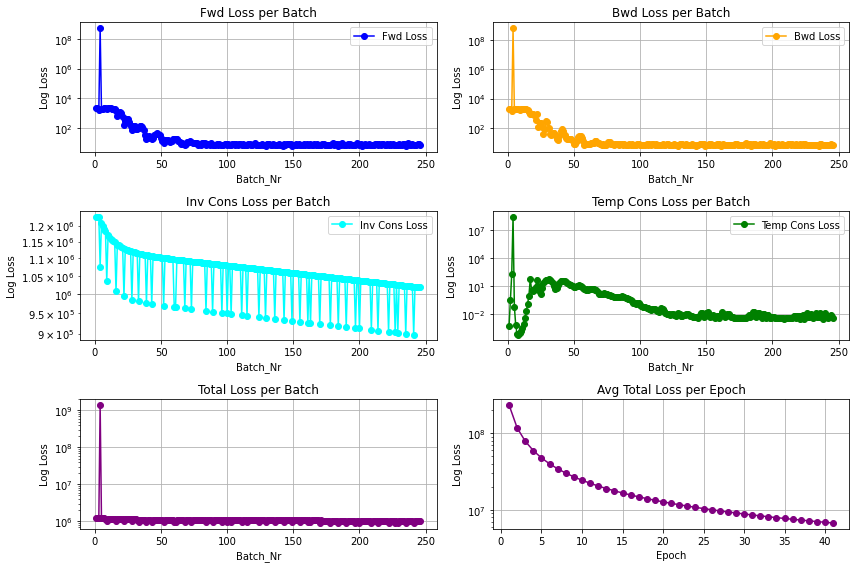

----------Training epoch--------
----------------41---------------

---------------Batch Nr. 247-------------------
Total Loss: 1017427.0
FwdLoss: 8.110095977783203
BwdLoss: 8.096681594848633
Inv_Cons_Loss: 1017410.8125
Temp_Cons_Loss: 0.007170423865318298
---------------Batch Nr. 248-------------------
Total Loss: 1017101.1875
FwdLoss: 7.3505730628967285
BwdLoss: 7.312294006347656
Inv_Cons_Loss: 1017086.5
Temp_Cons_Loss: 0.008018371649086475
---------------Batch Nr. 249-------------------
Total Loss: 1016774.25
FwdLoss: 7.318927764892578
BwdLoss: 7.307387351989746
Inv_Cons_Loss: 1016759.625
Temp_Cons_Loss: 0.0044116368517279625
---------------Batch Nr. 250-------------------
Total Loss: 1016445.5625
FwdLoss: 7.480368614196777
BwdLoss: 7.439763069152832
Inv_Cons_Loss: 1016430.625
Temp_Cons_Loss: 0.0045719570480287075
---------------Batch Nr. 251-------------------
Total Loss: 894184.5
FwdLoss: 6.865988731384277
BwdLoss: 6.83834981918335
Inv_Cons_Loss: 894170.8125
Temp_Cons_Loss: 0.0075

KeyboardInterrupt: 

In [29]:

embedding_model = em.FF_AE([264,100,100,20], [20,100,100,264])
operator_model = op.LinearizingKoop(linearizer=op.FFLinearizer([20,30,40], [40,30,20]), koop=op.InvKoop(latent_dim=40))

LinKoopAE_model = ko.KoopmanModel(embedding=embedding_model, operator=operator_model)

dyntargetinfo=[pregnancy_df, feature_list, sample_id, time_id]

# Run training loop
tr.train(LinKoopAE_model, dataloader, lr= 0.01, learning_rate_change=0.8, num_epochs=200, max_Kstep=15, weight_decay=0.01, model_name='TestingKoop', dyntargetinfo = dyntargetinfo)


In [30]:
torch.save(LinKoopAE_model.state_dict(), '/Users/daviddornig/Documents/Master_Thesis/Bioinf/Code/philipp-trinh/KOOPOMICS/model_states/TestingKOOP')

In [ ]:
bwdM, fwdM = LinKoopAE_model.Kmatrix()

In [ ]:
fwdM

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(fwdM)
print("Matrix:")
print(fwdM)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(bwdM)
print("Matrix:")
print(bwdM)
print("\nEigenvalues:")
print(eigenvalues)
print("\nEigenvectors:")
print(eigenvectors)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a sample matrix
matrix = np.random.rand(40, 40)  # 10x10 matrix with random values

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(matrix, annot=False, fmt=".2f", cmap='viridis')

# Add labels and title
plt.title('Heatmap of the Given Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the heatmap
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(fwdM, annot=False, fmt=".2f", cmap='viridis')

# Add labels and title
plt.title('Heatmap of the Given Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the heatmap
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(bwdM, annot=False, fmt=".2f", cmap='viridis')

# Add labels and title
plt.title('Heatmap of the Given Matrix')
plt.xlabel('Columns')
plt.ylabel('Rows')

# Show the heatmap
plt.show()


In [ ]:
# Define a simple identity model that returns input as output
class SimpleModel(nn.Module):
    def __init__(self, input_size):
        super(SimpleModel, self).__init__()
        self.linear = nn.Linear(input_size, input_size)  # A linear layer that learns a transformation

    def forward(self, x):
        return self.linear(x)

# Instantiate model, loss function, and optimizer
model = SimpleModel(len(feature_list))
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Run training loop
train(model, dataloader, criterion, optimizer)
